In [2]:
## import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
## import dataset

In [5]:
cost_df = pd.read_csv('EconomiesOfScale.csv')

In [6]:
cost_df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [7]:
# explore dataset

In [9]:
cost_df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [10]:
cost_df.tail()

,Number of Units,Manufacturing Cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [11]:
cost_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [12]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Number of Units       1000 non-null float64
Manufacturing Cost    1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


In [13]:
# visualize dataset

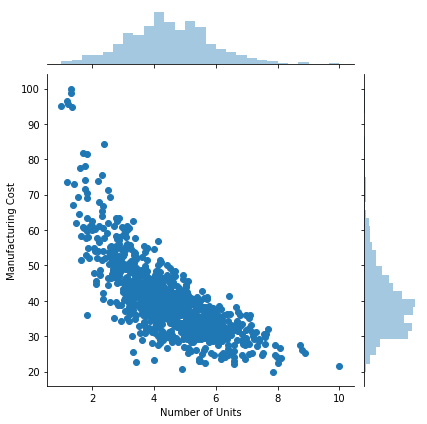

In [14]:
sns.jointplot(x ='Number of Units', y = 'Manufacturing Cost' , data = cost_df)

# data looks more of quadratic than linear. Now we know what model to use!!!!!!!!!!1

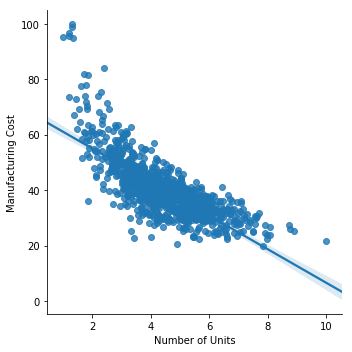

In [15]:
sns.lmplot(x ='Number of Units', y = 'Manufacturing Cost' , data = cost_df)

# the fit isn't that great. straight lines doesn't work for this data

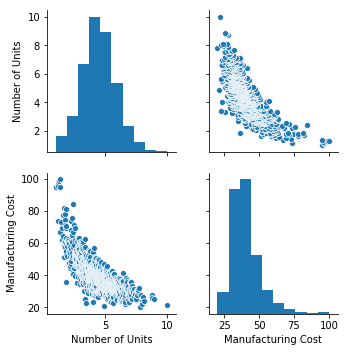

In [17]:
sns.pairplot(cost_df)

In [21]:
X_train = cost_df[['Number of Units']]

In [22]:
Y_train = cost_df[['Manufacturing Cost']]

# Creating Training Dataset linear assumption --------------------

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)

In [24]:
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
print('Model Coeff(m)', regressor.coef_)
print('Model Coeff(b)', regressor.intercept_)

Model Coeff(m) [[-6.0333683]]
Model Coeff(b) [67.03904193]


In [27]:
## visualize results

Text(0.5, 1.0, 'unit cost vs number of units(linear)')

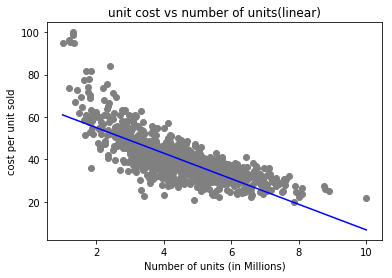

In [31]:
plt.scatter(X_train, Y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Number of units (in Millions)')
plt.ylabel('cost per unit sold')
plt.title('unit cost vs number of units(linear)')

In [32]:
## Polynomial assumption

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 5)
X_columns = poly_regressor.fit_transform(X_train, Y_train)

In [47]:
X_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.18599365e+00, 1.40658094e+00, 1.66819606e+00,
        1.97846993e+00, 2.34645277e+00],
       [1.00000000e+00, 1.19149864e+00, 1.41966901e+00, 1.69153369e+00,
        2.01546010e+00, 2.40141796e+00],
       ...,
       [1.00000000e+00, 8.78088812e+00, 7.71039962e+01, 6.77041565e+02,
        5.94502623e+03, 5.22026103e+04],
       [1.00000000e+00, 8.89769971e+00, 7.91690601e+01, 7.04422522e+02,
        6.26774007e+03, 5.57684690e+04],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04, 1.00000000e+05]])

In [48]:
regressor = LinearRegression()
regressor.fit(X_columns, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
print('Model coef (m)', regressor.coef_)

Model coef (m) [[ 0.00000000e+00 -9.24985286e+01  3.06811266e+01 -5.35771972e+00
   4.64221376e-01 -1.56845726e-02]]


In [50]:
print('Modelcoef (b)', regressor.intercept_)

Modelcoef (b) [159.92093215]


In [51]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

Text(0.5, 1.0, 'unit cost vs number of units(linear)')

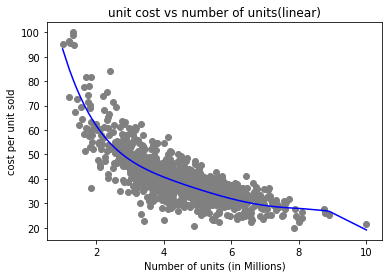

In [52]:
plt.scatter(X_train, Y_train, color = 'gray')
plt.plot(X_train, y_predict, color = 'blue')
plt.xlabel('Number of units (in Millions)')
plt.ylabel('cost per unit sold')
plt.title('unit cost vs number of units(linear)')